# Adedeji ESAN Project: Natural Language Processing (NLP)
# Project Description: Twitter US Airline Sentiment
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezon


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

##  1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [ ]:
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

import numpy as np
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format



In [ ]:
# Read the dataset using pandas
Tweet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP Project/Tweets.csv')

In [ ]:
#It is always a good practice to eye-ball raw data to get a feel of the data
#check the number of structure of the file, number of attributes, types of attributes and 
#a general idea of likely challenges in the dataset. The file is csv format (csv). 
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# print the shape of the data set
# shape shows we have 14640 rows/records and 15 Columns/variables
Tweet.shape

(14640, 15)

## 2. Understand of data-columns: Exploratory Data Analysis (EDA) to understand the data better (5 Marks)
- Drop all other columns except “text” and “airline_sentiment”.
- Check the shape of data.
- Print first 5 rows of data.

In [ ]:
Tweet.describe()
## check descriptive stats, IQR, Std..value count

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,"14,640.00","14,640.00","10,522.00","14,640.00"
mean,"569,218,351,767,382,528.00",0.90,0.64,0.08
std,"779,111,158,481,836.75",0.16,0.33,0.75
min,"567,588,278,875,213,824.00",0.34,0.00,0.00
25%,"568,559,178,101,439,488.00",0.69,0.36,0.00
50%,"569,477,857,923,110,912.00",1.00,0.67,0.00
75%,"569,890,473,289,000,960.00",1.00,1.00,0.00
max,"570,310,600,460,525,568.00",1.00,1.00,44.00


In [ ]:
Tweet.info() 
# Checking the information of the data set, 
# dtypes: are mostly object, with 2 int64 dtypes and 2 float64 dtypes
# the 2 most important columns we will be using for analysis in this project as no null values
# the 2 columns are airline_sentiments and text


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
Tweet.columns 
# Names of columns is ok & clear to understand. 
# More information given above on each header (attribute info)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# value count of sentiments 
# negative sentiment count is highest
sentiment_count=Tweet['airline_sentiment'].value_counts()
sentiment_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

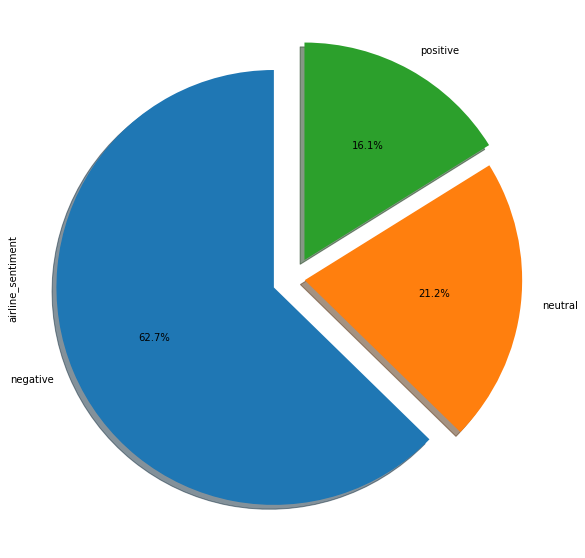

In [ ]:
# Visualising sentiments across the entire dataset to gain more insight in the feedback 
# highest sentiment category is negative (62.7%), hence we may argue the dataset is imbalance 
# however, we will not consider up-sampling or down-sampling in the project so as to see opportunites for improvements to positive sentiments

explode=(0.1, 0.05, 0.1)
Tweet['airline_sentiment'].value_counts().plot(kind='pie',figsize=(10, 10), autopct='%1.1f%%', shadow=True, startangle=90, explode = explode ); 

In [ ]:
# checking the values counts across the airlines
# United has the highest feedback and Virgin America has the least of all airlines
Airline_Count=Tweet['airline'].value_counts()
Airline_Count

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

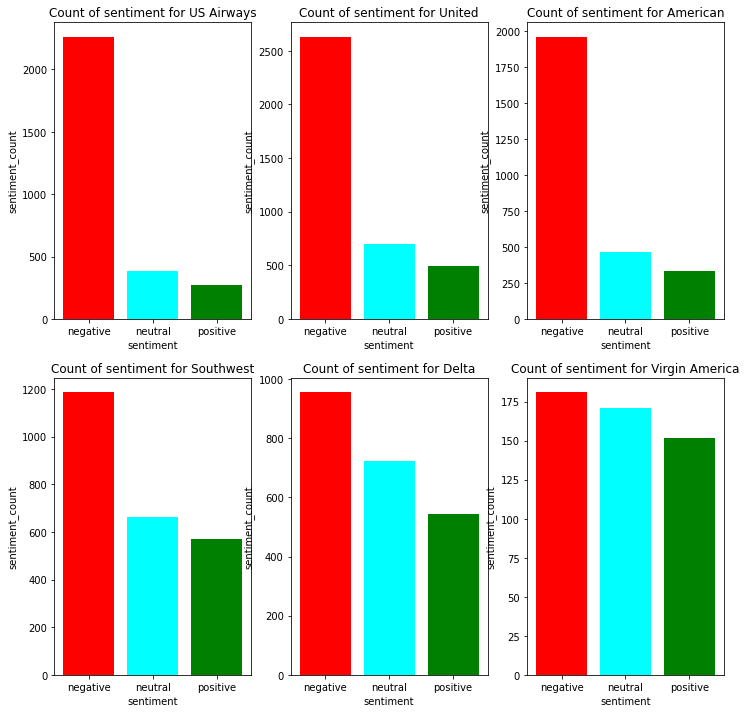

In [ ]:
# Define function to check sentiments distribution across the airlines
# Visualise the sentiment distribution across the airlines
# the results shows high negative sentiments across the airlines 
# we will explore further the reasons for negative sentiments below
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count,color=['red', 'cyan', 'green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('sentiment_count')
    plt.xlabel('sentiment')
    plt.title('Count of sentiment for '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [ ]:
# checking negative sentiments reasons count
# most people are complianing about customer service issues
# least compliant is on damaged luggages
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))
NR_Count

{'Bad Flight': 580,
 "Can't Tell": 1190,
 'Cancelled Flight': 847,
 'Customer Service Issue': 2910,
 'Damaged Luggage': 74,
 'Flight Attendant Complaints': 481,
 'Flight Booking Problems': 529,
 'Late Flight': 1665,
 'Lost Luggage': 724,
 'longlines': 178}

In [ ]:
# delving deeper into negative setiments to understand more
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [ ]:
# Visualising negative reasons to enable management advise and solutions 
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count,color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

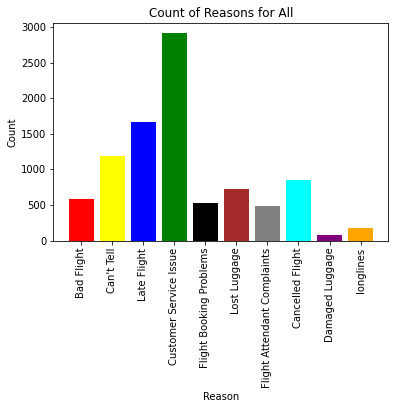

In [ ]:
plot_reason('All') # general reasons across airline, customer service issues predominate and damaged luggages least

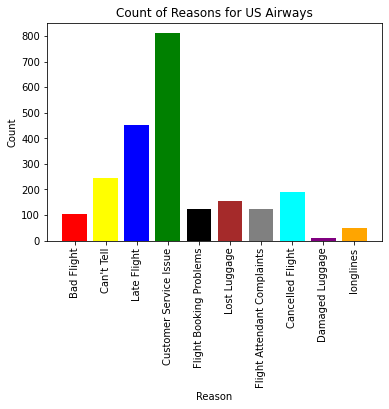

In [ ]:
plot_reason('US Airways') # general reasons for US airways, customer service issues predominate and damaged luggages least

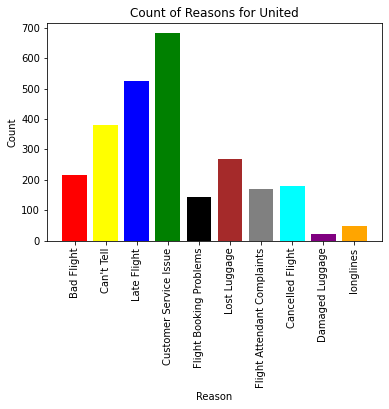

In [ ]:
plot_reason('United') # general reasons for united, customer service issues predominate and damaged luggages least

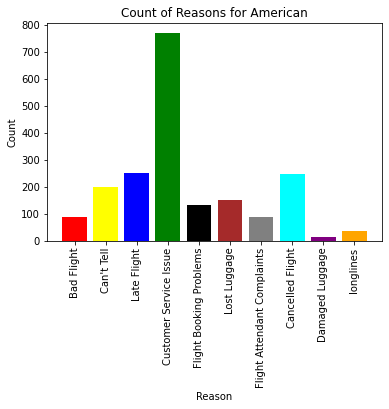

In [ ]:
plot_reason('American') # general reasons American, customer service issues predominate and damaged luggages least

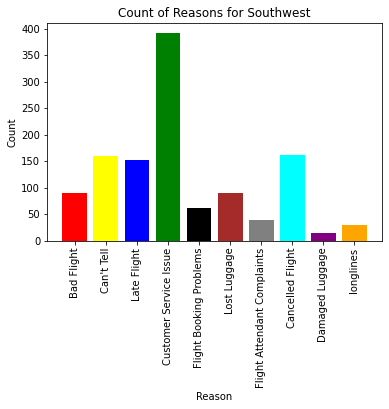

In [ ]:
plot_reason('Southwest') # general southwest airline, customer service issues predominate and damaged luggages least

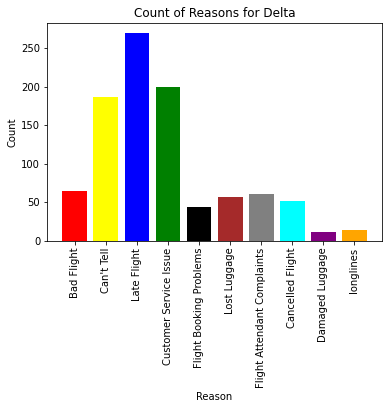

In [ ]:
plot_reason('Delta') # general reasons delta, late flight issues predominate and damaged luggages least

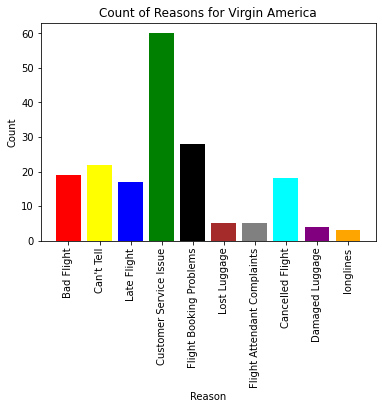

In [ ]:
plot_reason('Virgin America') # general reasons Virgin America airline, customer service issues predominate and damaged luggages least

### Creating Word Cloud for negative & positive Tweets

In [ ]:
# import word cloud for visualising sentiments words frequency
from wordcloud import WordCloud,STOPWORDS 

In [ ]:
# Generating word cloud for Negative tweets

wcn=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(wcn['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
# word cloud instantion and parameters set up
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

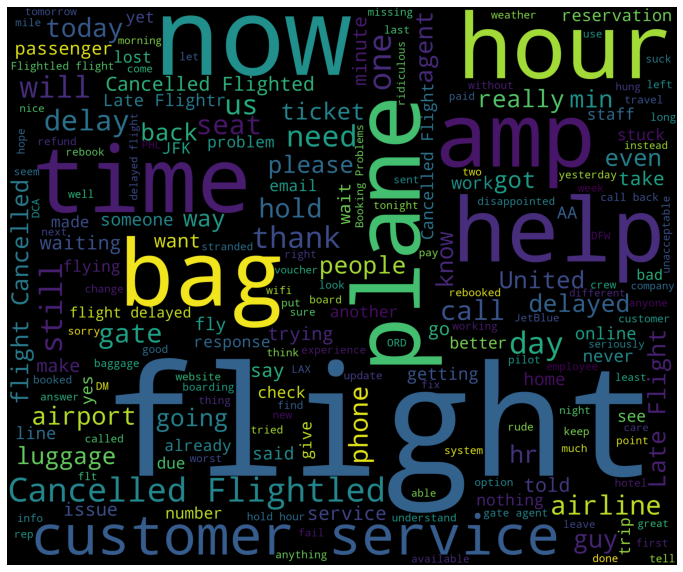

In [ ]:
# Visualising negative sentiments word cloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.

In [ ]:
# Generating word cloud for positive tweets
wcp=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(wcp['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
# parameterisation of word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

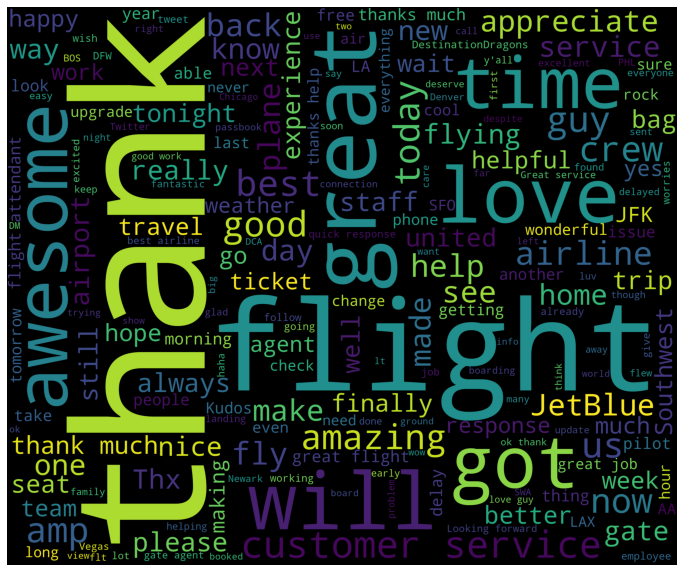

In [ ]:
# Visualising positive sentiment word cloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with positive moods are frequently involved some words like thanks, great, good or awesome. 

In [ ]:
# Dropping Unique ID and other non relevant columns as per project requirements 
# A unique identifier (UID) is a numeric or alphanumeric string that is associated with a single entity within a given system 

Tweet.drop (['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], inplace = True, axis=1)

In [ ]:
Tweet.shape 
# Checking the shape of the data after dropping non relevant columns 
# Now we have 2 columns vs 15 columns we started with originally

(14640, 2)

In [ ]:
Tweet.head() 
# checking the head after dropping non relevant columns 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## 3. Text pre-processing: Data preparation. (20 Marks)
- Html tag removal.
- Tokenization.
- Remove the numbers.
- Removal of Special Characters and Punctuations.
- Conversion to lowercase.
- Lemmatize or stemming.
- Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
- Print first 5 rows of data after pre-processing.





In [ ]:
import re, string, unicodedata

import nltk  # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup  # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Tweet.columns.values # checking values in Tweet after dropping un-necessary columns

array(['airline_sentiment', 'text'], dtype=object)

In [ ]:
Tweet.shape # checking shape of Tweet after dropping un-necessary columns

(14640, 2)

In [ ]:
Tweet.head() # check Tweet head for first 5 rows after dropping un-necessary columns

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
print (Tweet["text"][1000]) # print row 1000 to validate progress so far

@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.


In [ ]:
#Html tag removal
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

Tweet['text'] = Tweet['text'].apply(lambda x: strip_html(x))
Tweet.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
# removing numbers from text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

Tweet['text'] = Tweet['text'].apply(lambda x: remove_numbers(x))
Tweet.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
# Tokenization of data
Tweet['text'] = Tweet.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

In [ ]:
Tweet.head()   # checking the dataframe after tokenisation

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [ ]:
# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist)) 

In [ ]:
# Functions to convert a raw text to a string of words
# The input is a single string (a raw airline tweet), and 
# the output is a single string (a preprocessed airline tweet)

lemmatizer = WordNetLemmatizer() #instantiating the lemmatizer

def remove_non_ascii(words):
  #Remove non-ASCII characters from list of tokenized words
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    #Convert all characters to lowercase from list of tokenized words
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    #Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    #Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words): #lemmatization 
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words): #normalizing 
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

# run and apply the defined text preprocessing functions on 'text' column 
# apply normalisation and run through each row
Tweet['text'] = Tweet.apply(lambda row: normalize(row['text']), axis=1)

#check the dataframe after text preprocessing 
Tweet.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica nt today must mean need take ano...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [ ]:
print (Tweet["text"][0]) # Print first 5 rows of data after pre-processing, row 1

virginamerica dhepburn say


In [ ]:
print (Tweet["text"][1]) # Print first 5 rows of data after pre-processing, row 2

virginamerica plus add commercials experience tacky


In [ ]:
print (Tweet["text"][2]) # Print first 5 rows of data after pre-processing, row 3

virginamerica nt today must mean need take another trip


In [ ]:
print (Tweet["text"][3]) # Print first 5 rows of data after pre-processing, row 4

virginamerica really aggressive blast obnoxious entertainment guests face little recourse


In [ ]:
print (Tweet["text"][4]) # Print first 5 rows of data after pre-processing, row 5

virginamerica really big bad thing


In [ ]:
#Convert variable to a categorical variable as relevant to enable implementation of one-hot encoding
Tweet['airline_sentiment'] = Tweet['airline_sentiment'].astype('category')
Tweet['airline_sentiment'].dtype

CategoricalDtype(categories=['negative', 'neutral', 'positive'], ordered=False)

## 4. Vectorization: (10 Marks)
- Use CountVectorizer.
- Use TfidfVectorizer.



In [ ]:
# Import the countverctorizer library 
# The CountVectorizer provides a simple way to both tokenize a collection of text documents
# and also build a vocabulary of known words, but also to encode new documents using that vocabulary

from sklearn.feature_extraction.text import CountVectorizer
# Keep only 1000 features as number of features will increase the processing time.
vectorizer = CountVectorizer(max_features=1000)                
Tweet_features = vectorizer.fit_transform(Tweet['text'])
 # Convert the data features to array.
Tweet_features = Tweet_features.toarray()                       
# check shape
print (Tweet_features.shape)
# summarize
print(vectorizer.vocabulary_)


(14640, 1000)
{'virginamerica': 941, 'say': 763, 'plus': 668, 'add': 12, 'experience': 313, 'nt': 608, 'today': 881, 'must': 583, 'mean': 544, 'need': 588, 'take': 856, 'another': 45, 'trip': 896, 'really': 708, 'entertainment': 292, 'face': 319, 'little': 510, 'big': 103, 'bad': 87, 'thing': 867, 'seriously': 778, 'would': 985, 'pay': 646, 'flight': 351, 'seat': 767, 'play': 665, 'fly': 360, 'yes': 994, 'every': 301, 'time': 877, 'win': 970, 'go': 392, 'away': 82, 'miss': 570, 'without': 974, 'https': 437, 'well': 965, 'amaze': 37, 'arrive': 63, 'hour': 430, 'early': 276, 'good': 396, 'know': 478, 'second': 769, 'lead': 489, 'cause': 140, 'pretty': 680, 'much': 580, 'better': 101, 'great': 397, 'deal': 229, 'already': 34, 'think': 869, 'nd': 587, 'even': 298, 'st': 819, 'yet': 996, 'sky': 796, 'travel': 892, 'http': 436, 'thank': 866, 'schedule': 764, 'still': 830, 'mia': 556, 'excite': 308, 'first': 345, 'cross': 210, 'country': 202, 'lax': 487, 'mco': 542, 'hear': 412, 'nothing': 60

In [ ]:
# Import the TfidfVectorizer library from SKlearn
# Tfidf transforms text to feature vectors that can be used as input to estimator.
# In each vector the numbers (weights) represent features tf-idf score

from sklearn.feature_extraction.text import TfidfVectorizer

# Keep only 1000 features as number of features will increase the processing time.
Tfidfvectorizer = TfidfVectorizer(max_features=1000)
#fit the tfidfvectorizer
Tweet_features1 = Tfidfvectorizer.fit_transform(Tweet['text'])
#encore the feactures to array
Tweet_features1 = Tweet_features1.toarray()
#print shape of the array
print (Tweet_features1.shape)
# summarize
print(Tfidfvectorizer.vocabulary_)
# summarize encoded 


(14640, 1000)
{'virginamerica': 941, 'say': 763, 'plus': 668, 'add': 12, 'experience': 313, 'nt': 608, 'today': 881, 'must': 583, 'mean': 544, 'need': 588, 'take': 856, 'another': 45, 'trip': 896, 'really': 708, 'entertainment': 292, 'face': 319, 'little': 510, 'big': 103, 'bad': 87, 'thing': 867, 'seriously': 778, 'would': 985, 'pay': 646, 'flight': 351, 'seat': 767, 'play': 665, 'fly': 360, 'yes': 994, 'every': 301, 'time': 877, 'win': 970, 'go': 392, 'away': 82, 'miss': 570, 'without': 974, 'https': 437, 'well': 965, 'amaze': 37, 'arrive': 63, 'hour': 430, 'early': 276, 'good': 396, 'know': 478, 'second': 769, 'lead': 489, 'cause': 140, 'pretty': 680, 'much': 580, 'better': 101, 'great': 397, 'deal': 229, 'already': 34, 'think': 869, 'nd': 587, 'even': 298, 'st': 819, 'yet': 996, 'sky': 796, 'travel': 892, 'http': 436, 'thank': 866, 'schedule': 764, 'still': 830, 'mia': 556, 'excite': 308, 'first': 345, 'cross': 210, 'country': 202, 'lax': 487, 'mco': 542, 'hear': 412, 'nothing': 60

In [ ]:
labels = Tweet['airline_sentiment'] # create the y varible for the model

## 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

### 5.1 Fit and evaluate model on CountVectorizer

In [ ]:
# Split data into training and testing set.
# import train test split form sklearn
# 30% of the data set will be used for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Tweet_features, labels, test_size=0.3, random_state=1)


In [ ]:
# import the classifying models and also metrics for scoring the models 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
# instantiate the respective classifying models (Using defualt values) on the CountVectorizer  

Classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ]

Accuracy of SVCis 0.7812841530054645
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      2741
     neutral       0.65      0.52      0.58       936
    positive       0.78      0.60      0.68       715

    accuracy                           0.78      4392
   macro avg       0.75      0.68      0.71      4392
weighted avg       0.78      0.78      0.77      4392



<Figure size 432x288 with 0 Axes>

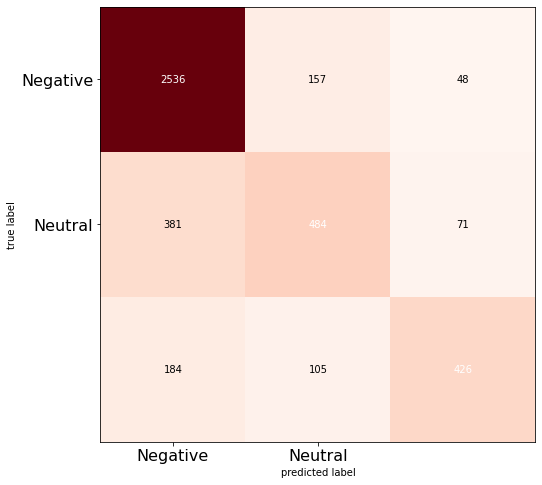

Accuracy of DecisionTreeClassifieris 0.6629781420765027
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      2741
     neutral       0.44      0.46      0.45       936
    positive       0.57      0.58      0.58       715

    accuracy                           0.69      4392
   macro avg       0.61      0.61      0.61      4392
weighted avg       0.69      0.69      0.69      4392



<Figure size 432x288 with 0 Axes>

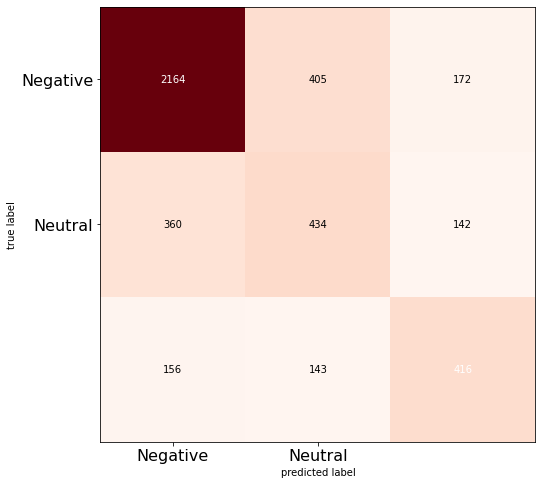

Accuracy of RandomForestClassifieris 0.7487021857923497
              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      2741
     neutral       0.57      0.49      0.53       936
    positive       0.69      0.60      0.64       715

    accuracy                           0.75      4392
   macro avg       0.69      0.66      0.67      4392
weighted avg       0.74      0.75      0.75      4392



<Figure size 432x288 with 0 Axes>

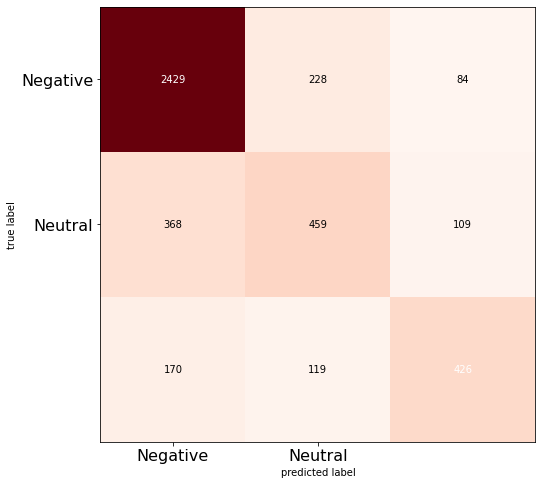

Accuracy of AdaBoostClassifieris 0.7393442622950819
              precision    recall  f1-score   support

    negative       0.79      0.89      0.83      2741
     neutral       0.53      0.40      0.46       936
    positive       0.72      0.61      0.66       715

    accuracy                           0.74      4392
   macro avg       0.68      0.63      0.65      4392
weighted avg       0.72      0.74      0.72      4392



<Figure size 432x288 with 0 Axes>

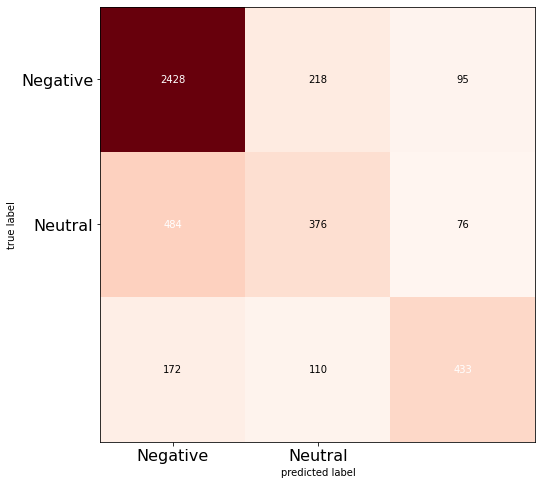

In [ ]:
# fit and predict the model at countvertorizer 
# Visual output using confusion matrix
# predict socres for model using acurracy, F1, Recall, Precision

Accuracy=[]
Model=[]
cv = KFold(10)

for classifier in Classifiers:
 
    fit = classifier.fit(X_train, y_train)
    pred = fit.predict(X_test)
    
    accuracy = np.mean(cross_val_score(classifier, Tweet_features, labels, cv=cv))
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(y_test, pred))
    
    cm=confusion_matrix(y_test, pred)
    
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()
  

Text(0.5, 1.0, 'Accuracies of Models')

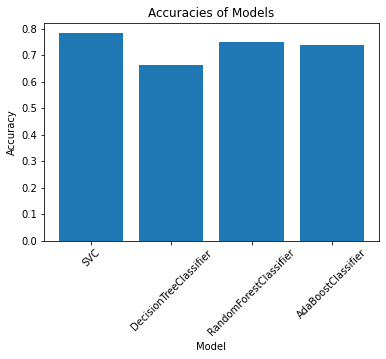

In [ ]:
# visualise accuracies across each model for countVectoriser
# SVC is the best model followed by Random forest models then AdaGradient boost
# Decision tree classifer performed worst than other models
Index = [1,2,3,4]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

### 5.2 Fit and evaluate model on TfidfVectorizer

In [ ]:
# split using Tweet_features1 from Tfidfvectorizer
X_train, X_test, y_train, y_test = train_test_split(Tweet_features1, labels, test_size=0.3, random_state=1)

# # instantiate the respective classifying models (using defualt values) on the TfidfVectorizer 
Classifiers2 = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ]

Accuracy of SVCis 0.7790300546448087
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      2741
     neutral       0.67      0.47      0.55       936
    positive       0.79      0.61      0.69       715

    accuracy                           0.78      4392
   macro avg       0.76      0.67      0.70      4392
weighted avg       0.77      0.78      0.77      4392



<Figure size 432x288 with 0 Axes>

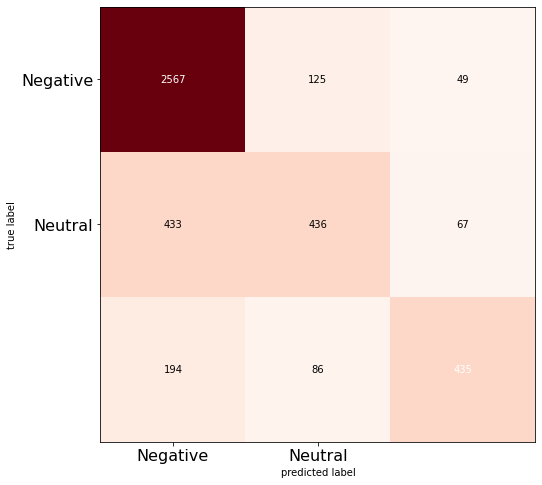

Accuracy of DecisionTreeClassifieris 0.6724726775956285
              precision    recall  f1-score   support

    negative       0.79      0.80      0.79      2741
     neutral       0.44      0.45      0.44       936
    positive       0.57      0.52      0.54       715

    accuracy                           0.68      4392
   macro avg       0.60      0.59      0.59      4392
weighted avg       0.68      0.68      0.68      4392



<Figure size 432x288 with 0 Axes>

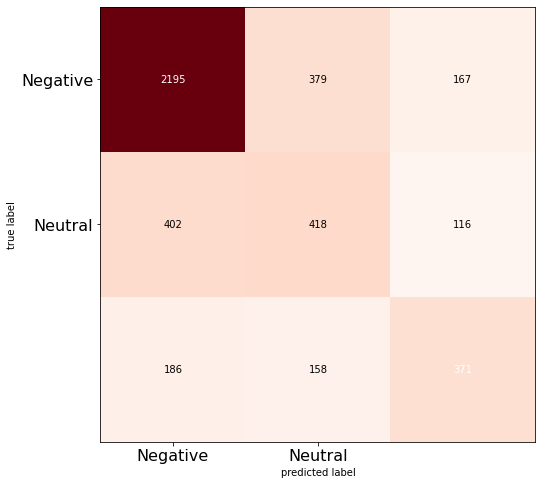

Accuracy of RandomForestClassifieris 0.7561475409836066
              precision    recall  f1-score   support

    negative       0.80      0.94      0.86      2741
     neutral       0.64      0.44      0.52       936
    positive       0.77      0.55      0.64       715

    accuracy                           0.77      4392
   macro avg       0.73      0.64      0.68      4392
weighted avg       0.76      0.77      0.75      4392



<Figure size 432x288 with 0 Axes>

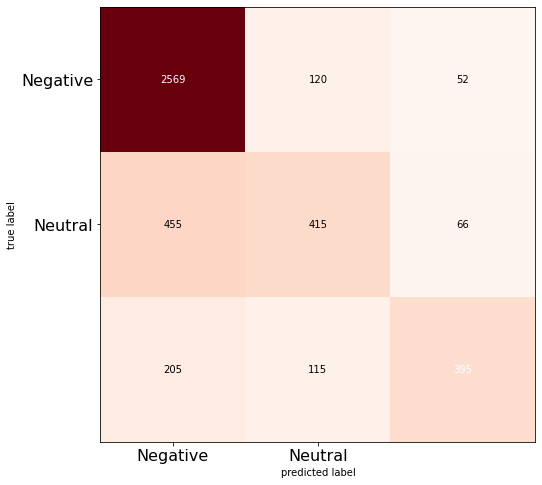

Accuracy of AdaBoostClassifieris 0.7377049180327869
              precision    recall  f1-score   support

    negative       0.81      0.87      0.84      2741
     neutral       0.54      0.47      0.50       936
    positive       0.72      0.61      0.66       715

    accuracy                           0.74      4392
   macro avg       0.69      0.65      0.67      4392
weighted avg       0.73      0.74      0.74      4392



<Figure size 432x288 with 0 Axes>

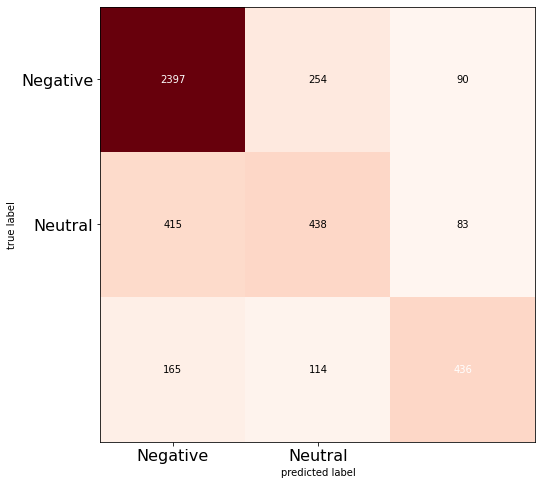

In [ ]:
# fit and predict the model at tfidfvertorizer 
# Visual output using confusion matrix
# predict socres for model using acurracy, F1, Recall, Precision
Accuracy1=[]
Model1=[]
cv = KFold(10)

for classifier in Classifiers2:
 
    fit = classifier.fit(X_train, y_train)
    pred = fit.predict(X_test)
    
    accuracy = np.mean(cross_val_score(classifier, Tweet_features1, labels, cv=cv))
    Accuracy1.append(accuracy)
    Model1.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(y_test, pred))
    
    cm=confusion_matrix(y_test, pred)
    
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()
  

Text(0.5, 1.0, 'Accuracies of Models')

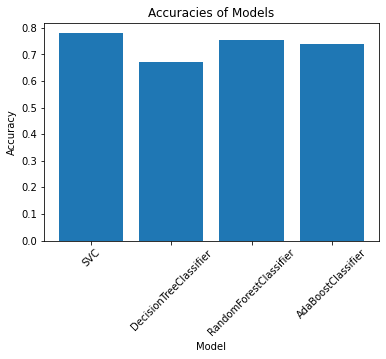

In [ ]:
# visualise accuracies across each model for tfidfvectoriser
# SVC is the best model followed by Random forest models then AdaGradient boost
# Decision tree classifer performed worst than other models
Index = [1,2,3,4]
plt.bar(Index,Accuracy1)
plt.xticks(Index, Model1,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [ ]:
#checking VaderSentiment on the clean train data set
# VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis 
# that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion
# VADER: Normalize the score to be between -1 and 1 using an alpha that approximates the max expected value
# the analysis shows polarity as mainly neutral? and a very good model at compound socore of 1
# result shows mainly neutral sentiment

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text=SentimentIntensityAnalyzer()
score=text.polarity_scores(Tweet['text'])
print(score)

     |████████████████████████████████| 133kB 5.0MB/s 
{'neg': 0.124, 'neu': 0.712, 'pos': 0.165, 'compound': 1.0}


## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)
In this project, I created classifer models for Natural Language Processing (NLP) using countvectorizer and tfidfvectorizer and various text preprocessing techniques on a sentiment analysis job about the problems of each major U.S. airline from a scrapped Twitter data. 

The dataset shape shows we have 14640 rows/records and 15 Columns/variables.I visualised sentiments across the entire dataset to gain more insight in the feedback and found that, highest sentiment category is negative, hence we may argue the dataset is imbalance. I checked negative sentiments reasons count and the result shows most people are complianing about customer service issues and least compliant is on damaged luggages.

Further more, I  developed a function for Word Cloud of sentiments for visualisation purposes. Negative word cloud shows that the Tweets with negative sentiments frequently involve words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights. Whlist from the Postive word cloud, I found that the Tweets with positive moods are frequently involved some words like thanks, great, good or awesome. 

I went further in my EDA to drop Unique ID and other non relevant columns as per project requirements. A unique identifier (UID) is a numeric or alphanumeric string that is associated with a single entity within a given system. I Checked the shape of the data after dropping non relevant columns and we now have 2 columns vs 15 columns we started with originally. These 2 columns are 'airline sentiment' and 'text'.

After EDA, I then commenced Text preprocessing activities. To achieve the text preprocessing, I imported the necessary libraries like nltk, re, string, unicodedata, contration, etc and I defined text pre-processing functions with the aim of converting a raw text to a string of words. The input is a single string (a raw airline sentiment), and the output is a single string (a preprocessed airline sentiment). The following as the steps within the preprocessing functions: 
- Html tag removal using BeautifulSoup library
- Tokenization using ToktokTokenizer library
- Remove the numbers using regular expression library
- Removal of Special Characters and Punctuations using regular expression library
- Conversion to lowercase using letters_only.lower 
- Lemmatize using WordNetLemmatizer
- Join the words in the list to convert back to text string in the dataframe so that each row contains the data in text format, normalised that data and printed first 5 rows of data after pre-processing.

Further to the text preprocessing output, I then carried out vectorisation on the cleaned text data using both CountVectorizer and Tfidfvectorizer with max feature of 1000. I splited my data  and instatiated my train, test split with 30% test split and radom state of 1 and also instantied 4 different algorithms on the countvectoriser feature and also on the Tfidfvectoriser feature with cross validation. After building the classification model, I predicted the result for the test data.
After that I saw that using the above techniques, our model performed is good (especially with SVC, Random Forest and AdaGradBoost) in perspective of how the text classification models perform.

Finally, SVC is the best model across both vectorisers. One way to increase accuracy is to use different variations of Pre-processing techniques & also carry out hyperparamter tunning on the models as default values where used in this project.



